# Functions

In [6]:
%pylab inline
import numpy as np
from PIL import Image
import cv2

def warp_affine(image, matrix):
    matrix = np.array(matrix, dtype=np.float32)
    output = cv2.warpAffine(image, matrix[:2, :], 
                            dsize=(image.shape[1], image.shape[0]),
                            flags=cv2.INTER_LINEAR,
#                             borderMode=cv2.BORDER_REPLICATE,
                            borderValue=0)
    return output

def display_warp_affine(image, matrix, plot, title):
    output = warp_affine(image, matrix)
    plot.imshow(output)
    plot.set_title(title)
    plot.get_xaxis().set_visible(False)
    plot.get_yaxis().set_visible(False)

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['matrix']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [4]:
image = np.asarray(Image.open('images/nayeon.jpg').convert('RGB'))

pts1 = np.float32([[200,100],[400,100],[200,200]])
pts2 = np.float32([[200,300],[400,200],[200,400]])

cv2.getAffineTransform(pts1, pts2)

array([[  1. ,   0. ,   0. ],
       [ -0.5,   1. , 300. ]])

# Examples

/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


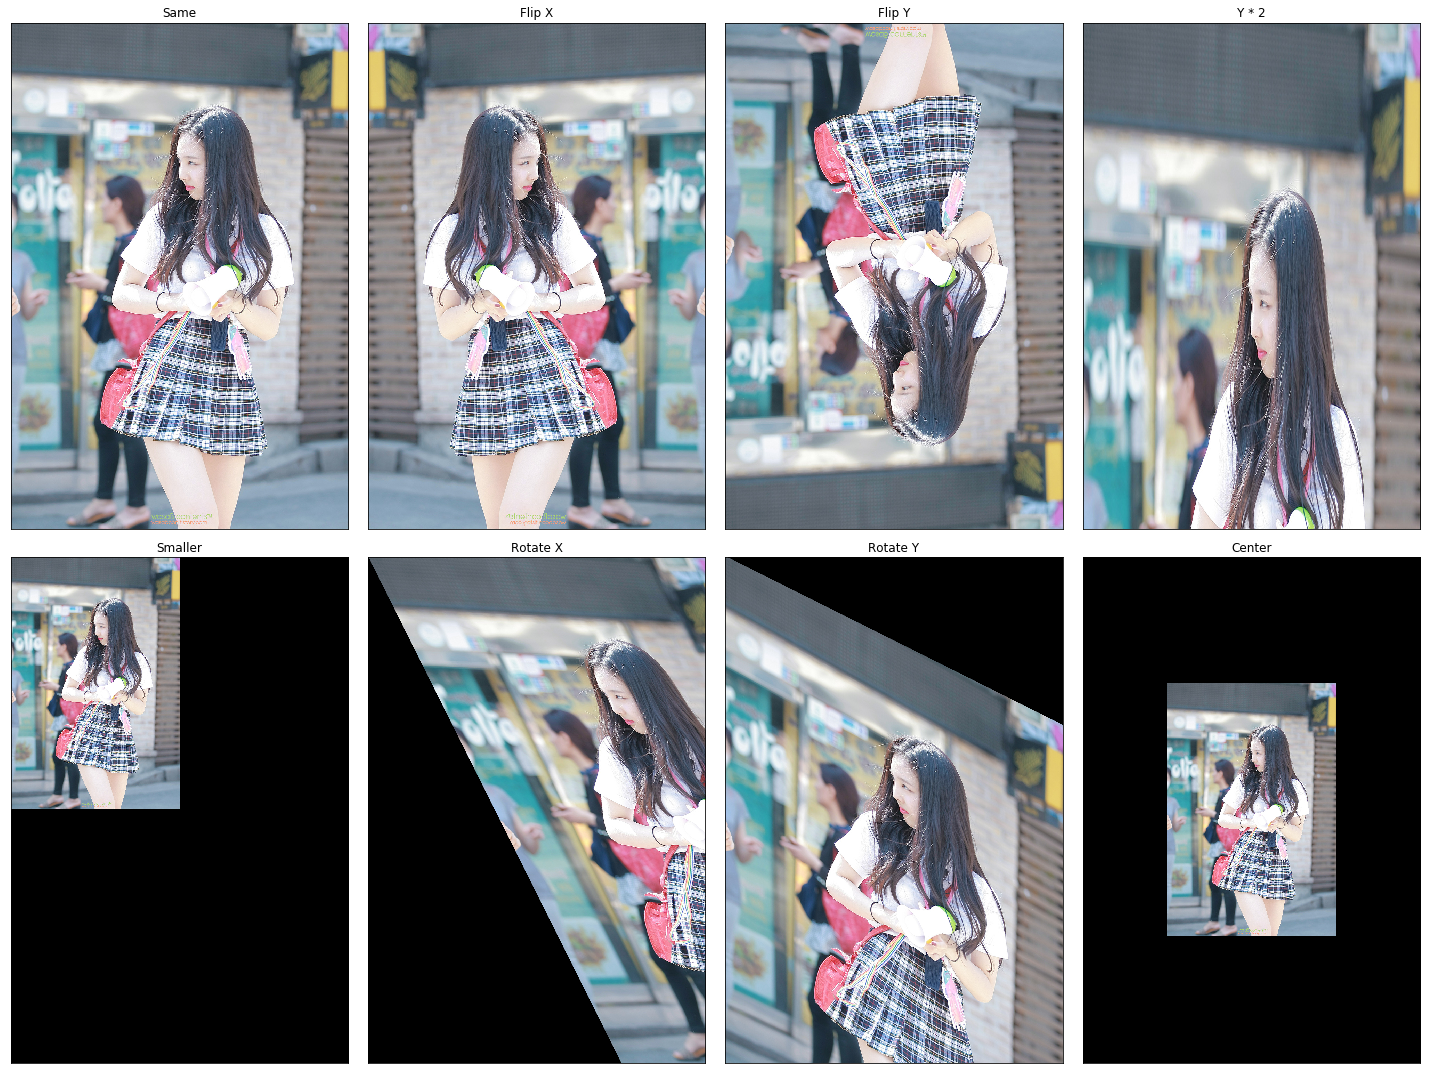

In [5]:
image = np.asarray(Image.open('images/nayeon.jpg').convert('RGB'))
height, width, _ = image.shape

# Plot setting
fig, plots = subplots(2, 4)
plots = plots.reshape(-1)
fig.set_tight_layout(True)
fig.set_figheight(15)
fig.set_figwidth(20)

# Same
matrix = [[1,  0,  0], 
          [0,  1,  0], 
          [0,  0,  1]]
display_warp_affine(image, matrix, plots[0], 'Same')

# Flip X
matrix = [[-1,  0,  width], 
          [0,  1,  0], 
          [0,  0,  1]]
display_warp_affine(image, matrix, plots[1], 'Flip X')

# Flip Y
matrix = [[1,  0,  0], 
          [0,  -1,  height], 
          [0,  0,  1]]
display_warp_affine(image, matrix, plots[2], 'Flip Y')

# Y * 2
matrix = [[1,  0,  0], 
          [0,  2,  0], 
          [0,  0,  1]]
display_warp_affine(image, matrix, plots[3], 'Y * 2')

# Smaller
matrix = [[0.5,  0,  0], 
          [0,  0.5,  0], 
          [0,  0,  1]]
display_warp_affine(image, matrix, plots[4], 'Smaller')

# Smaller
matrix = [[1,  0.5,  0], 
          [0,  1,  0], 
          [0,  0,  1]]
display_warp_affine(image, matrix, plots[5], 'Rotate X')


# Smaller
matrix = [[1,  0, 0], 
          [0.5,  1,  0], 
          [0,  0,  1]]
display_warp_affine(image, matrix, plots[6], 'Rotate Y')

# Center
matrix = [[0.5,  0, width/4], 
          [0,  0.5,  height/4], 
          [0,  0,  1]]
display_warp_affine(image, matrix, plots[7], 'Center')

# Change origin to Center

height: 1458 width: 972


/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


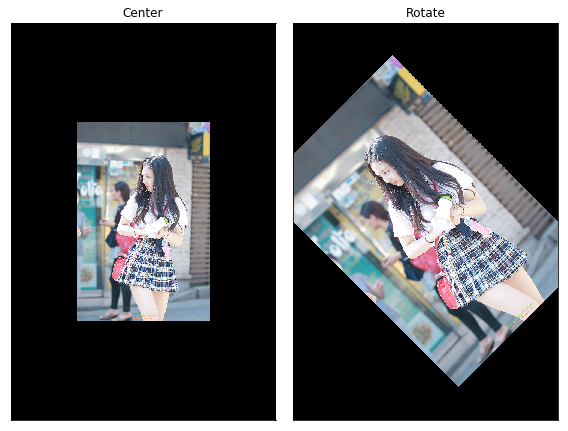

In [56]:
def change_origin(transform, center):
    center = np.array(center)
    return np.linalg.multi_dot([translation(center), transform, translation(-center)])

def translation(translation):
    return np.array([
        [1, 0, translation[0]],
        [0, 1, translation[1]],
        [0, 0, 1]
    ])

image = np.asarray(Image.open('images/nayeon.jpg').convert('RGB'))
height, width, _ = image.shape
print('height:', height, 'width:', width)

# Plot setting
fig, plots = subplots(1, 2)
plots = plots.reshape(-1)
fig.set_tight_layout(True)
fig.set_figheight(6)
fig.set_figwidth(8)


# Center
matrix = [[0.5,  0,  0], 
          [0,  0.5,  0], 
          [0,  0,  1]]
matrix = change_origin(matrix, (width/2, height/2))
display_warp_affine(image, matrix, plots[0], 'Center')


# Rotate
matrix = [[0.5,  0.5,  0], 
          [-0.5,  0.5,  0], 
          [0,  0,  1]]
matrix = change_origin(matrix, (width/2, height/2))
display_warp_affine(image, matrix, plots[1], 'Rotate')